# Лабораторная работа по заданию №  5. Алгоритмы на графах. Введение в графы и основные алгоритмы на графах

In [1]:
import numpy as np
import networkx as nx
from collections import deque

### Генерация графа

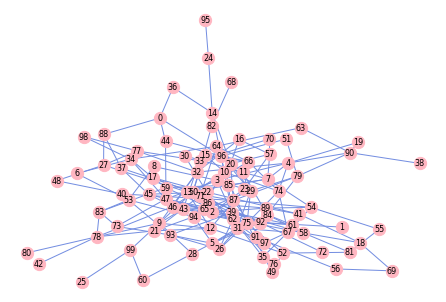

In [151]:
G=nx.generators.random_graphs.gnm_random_graph(100, 200, 2)
nx.draw(G, node_size=150,  with_labels=True, node_color='#FFB6C1', width=1, edge_color='#748EE1', font_size=8)

### Вывод матрицы смежности

In [152]:
adjacency_matrix=nx.to_numpy_matrix(G)
print(adjacency_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Прведение графа к списку смежности

In [153]:
adjacency_list=nx.convert.to_dict_of_lists(G)
print(adjacency_list)

{0: [88, 44, 96, 36], 1: [92], 2: [47, 89, 23, 65, 46, 87, 86], 3: [4, 29, 86, 8, 39, 13, 66, 47], 4: [74, 3, 7, 19, 32, 90], 5: [93, 31, 94, 92], 6: [34, 53], 7: [11, 13, 54, 4, 85, 57], 8: [3, 53], 9: [43, 32, 78, 28, 12], 10: [46, 14, 75, 15, 74], 11: [7, 84, 30], 12: [21, 13, 23, 52, 9], 13: [7, 87, 3, 12, 27, 39], 14: [10, 36, 20, 24], 15: [66, 50, 32, 10], 16: [32, 57, 20], 17: [22, 34, 71, 59], 18: [41, 58, 69], 19: [4, 90], 20: [87, 57, 94, 16, 14, 29], 21: [94, 71, 78, 12], 22: [30, 41, 17, 31, 45], 23: [57, 66, 2, 12], 24: [95, 14], 25: [99], 26: [62, 31, 93, 75], 27: [77, 13, 48, 88], 28: [84, 60, 9], 29: [3, 75, 65, 31, 79, 96, 20], 30: [22, 11], 31: [67, 26, 22, 5, 29], 32: [77, 16, 4, 9, 46, 15], 33: [96, 43, 77, 70], 34: [64, 98, 6, 17, 47], 35: [62, 67], 36: [14, 0], 37: [88, 45, 50], 38: [90], 39: [85, 61, 93, 3, 58, 47, 13, 92], 40: [48, 87], 41: [22, 89, 18], 42: [78], 43: [9, 62, 33], 44: [59, 0, 96], 45: [46, 65, 37, 22], 46: [10, 59, 65, 75, 45, 32, 2, 78], 47: [6

### Определение функций обхода графа в ширину

In [154]:
#В ширину
def bfs (adg_list, first_vertex, second_vertex):
    visited_vertex=[]
    q = deque()
    q.append(first_vertex)
    exitFlag=False
    while q:        
        if(exitFlag):
            break
        current_vertex=q.popleft()
        if second_vertex != current_vertex:
            visited_vertex.append(current_vertex)
            for el in adg_list[current_vertex]:
                if el!=second_vertex:   
                    if (el not in visited_vertex) and (el not in q):
                        q.append(el)
                else:
                    exitFlag=True
                    visited_vertex.append(second_vertex)
                    print ('The shortest way:')
                    print(visited_vertex)
                    break
    if exitFlag==False:
        print(f'Вершины {second_vertex} невозможно достичь из вершины {first_vertex}' )
        
bfs(adjacency_list, 1, 70)   

The shortest way:
[1, 92, 50, 72, 71, 65, 39, 5, 61, 99, 91, 15, 82, 37, 21, 86, 64, 17, 47, 46, 45, 62, 29, 2, 85, 93, 3, 58, 13, 31, 94, 84, 67, 25, 60, 97, 56, 66, 32, 10, 68, 88, 78, 12, 89, 34, 63, 22, 59, 73, 75, 35, 26, 43, 96, 87, 76, 79, 20, 23, 7, 53, 4, 8, 81, 18, 27, 28, 11, 54, 74, 69, 77, 16, 9, 14, 0, 83, 80, 42, 52, 41, 98, 6, 90, 30, 44, 49, 33, 70]


### Определение функций обхода графа в глубину

In [155]:
#В глубину
start=0
visiting_list=[]
visited = [False] * (100)
visiting_list.append(start)

def dfs(adg_list, start):    
    visited[start] = True
    for v in adg_list[start]:
        if not visited[v]:
            dfs(adg_list, v)
            visiting_list.append(v)
            
dfs(adjacency_list, start)
print("Порядок обхода:")
print(visiting_list)

#Подсчет связных компонент
visited = [False] * (100)
ncomp = 0
for i in range(100):
    if not visited[i]:
        print(i)
        ncomp += 1
        dfs(adjacency_list, i)
print('Число связных компонент:')
print(ncomp)

Порядок обхода:
[0, 36, 55, 74, 38, 63, 90, 19, 4, 44, 25, 70, 33, 43, 80, 42, 78, 40, 48, 27, 13, 12, 9, 28, 60, 99, 97, 30, 17, 5, 73, 93, 26, 31, 22, 89, 41, 18, 69, 56, 91, 15, 68, 82, 50, 72, 1, 92, 61, 39, 85, 59, 83, 6, 8, 53, 94, 21, 71, 86, 3, 29, 49, 75, 52, 81, 58, 84, 11, 7, 54, 67, 35, 76, 62, 65, 47, 2, 23, 57, 16, 32, 77, 98, 34, 64, 66, 96, 51, 79, 87, 20, 95, 24, 14, 10, 46, 45, 37, 88]
0
Число связных компонент:
1
